In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzy_match import algorithims

In [96]:
# carga de df_books
columns_books = ['Title', 'authors', 'image', 'previewLink', 'publisher', 'publishedDate', 'infoLink',
               'categories', 'ratingsCount']

columns_reviews = ['Id', 'Title', 'Price', 'review/helpfulness', 'review/score', 'review/text']

df_books = pd.read_csv('data/books_data.csv', usecols=columns_books)
df_books.head(10)

,Title,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN
5,The Church of Christ: A Biblical Ecclesiology ...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0
6,The Overbury affair (Avon),['Miriam Allen De Ford'],NaN,http://books.google.nl/books?id=mHLTngEACAAJ&d...,NaN,1960,http://books.google.nl/books?id=mHLTngEACAAJ&d...,NaN,NaN
7,A Walk in the Woods: a Play in Two Acts,['Lee Blessing'],NaN,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,1988,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,3.0
8,Saint Hyacinth of Poland,['Mary Fabyan Windeatt'],http://books.google.com/books/content?id=lmLqA...,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,Tan Books & Pub,2009-01-01,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,['Biography & Autobiography'],NaN
9,Rising Sons and Daughters: Life Among Japan's ...,['Steven Wardell'],NaN,http://books.google.nl/books?id=rbLZugEACAAJ&d...,Plympton PressIntl,1995,http://books.google.nl/books?id=rbLZugEACAAJ&d...,['Social Science'],NaN


In [97]:
# carga de df_reviews
df_reviews = pd.read_csv('data/Books_rating.csv', usecols=columns_reviews)
df_reviews.head(10)

,Id,Title,Price,review/helpfulness,review/score,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,7/7,4.0,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,10/10,5.0,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,10/11,5.0,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,7/7,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,3/3,4.0,Philip Nel - Dr. Seuss: American IconThis is b...
5,0826414346,Dr. Seuss: American Icon,NaN,2/2,4.0,"""Dr. Seuss: American Icon"" by Philip Nel is a ..."
6,0826414346,Dr. Seuss: American Icon,NaN,3/4,5.0,Theodor Seuss Giesel was best known as 'Dr. Se...
7,0826414346,Dr. Seuss: American Icon,NaN,0/0,5.0,When I recieved this book as a gift for Christ...
8,0826414346,Dr. Seuss: American Icon,NaN,0/0,5.0,Trams (or any public transport) are not usuall...
9,0826414346,Dr. Seuss: American Icon,NaN,3/5,4.0,"As far as I am aware, this is the first book-l..."


In [98]:
# datos de df_book
print("Datos de books_data.csv")
print("Datos por columna:\n", df_books.count(), sep="", end="\n\n")
print("Datos faltantes por columna:\n", df_books.isna().sum(), sep="", end="\n\n")
print("% datos faltantes por columna:\n", df_books.isna().sum() * 100 / len(df_books), sep="", end="\n\n")

Datos de books_data.csv
Datos por columna:
Title            212403
authors          180991
image            160329
previewLink      188568
publisher        136518
publishedDate    187099
infoLink         188568
categories       171205
ratingsCount      49752
dtype: int64

Datos faltantes por columna:
Title                 1
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

% datos faltantes por columna:
Title             0.000471
authors          14.789270
image            24.516958
previewLink      11.222011
publisher        35.727199
publishedDate    11.913617
infoLink         11.222011
categories       19.396527
ratingsCount     76.576712
dtype: float64



In [99]:
# datos de df_reviews
print("Datos de Books_rating.csv")
print("Datos por columna:\n", df_reviews.count(), sep="", end="\n\n")
print("Datos faltantes por columna:\n", df_reviews.isna().sum(), sep="", end="\n\n")
print("% datos faltantes por columna:\n", df_reviews.isna().sum() * 100 / len(df_reviews), sep="", end="\n\n")

Datos de Books_rating.csv
Datos por columna:
Id                    3000000
Title                 2999792
Price                  481171
review/helpfulness    3000000
review/score          3000000
review/text           2999992
dtype: int64

Datos faltantes por columna:
Id                          0
Title                     208
Price                 2518829
review/helpfulness          0
review/score                0
review/text                 8
dtype: int64

% datos faltantes por columna:
Id                     0.000000
Title                  0.006933
Price                 83.960967
review/helpfulness     0.000000
review/score           0.000000
review/text            0.000267
dtype: float64



## Preprocesamiento de los datos

In [100]:
df_books = df_books.drop(columns=['ratingsCount', 'image', 'previewLink', 'infoLink']).dropna()
df_reviews = df_reviews.dropna()

In [101]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130433 entries, 1 to 212402
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Title          130433 non-null  object
 1   authors        130433 non-null  object
 2   publisher      130433 non-null  object
 3   publishedDate  130433 non-null  object
 4   categories     130433 non-null  object
dtypes: object(5)
memory usage: 6.0+ MB


In [102]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481164 entries, 10 to 2999988
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  481164 non-null  object 
 1   Title               481164 non-null  object 
 2   Price               481164 non-null  float64
 3   review/helpfulness  481164 non-null  object 
 4   review/score        481164 non-null  float64
 5   review/text         481164 non-null  object 
dtypes: float64(2), object(4)
memory usage: 25.7+ MB


### Análisis de libros duplicados en df de libros

In [103]:
df_books_unique = df_books["Title"].drop_duplicates(ignore_index=True)

print("\nCantidad de titulos sin duplicar en el df de libros: {}".format(df_books_unique.count()), end="\n")

print(f"Cantidad de libros en el df de libros: {df_books.count()}")


Cantidad de titulos sin duplicar en el df de libros: 130433
Cantidad de libros en el df de libros: Title            130433
authors          130433
publisher        130433
publishedDate    130433
categories       130433
dtype: int64


### Almacenamiento parcial de los cambios


In [104]:
df_books.to_csv('data/copia_1_books.csv', index=False)
df_reviews.to_csv('data/copia_1_reviews.csv', index=False)

### Carga de los cambios parciales

In [105]:
df_books = pd.read_csv('data/copia_1_books.csv')
df_reviews = pd.read_csv('data/copia_1_reviews.csv')

In [106]:
import re

### Análisis de Ids

In [107]:
df_reviews.head(10)

,Id,Title,Price,review/helpfulness,review/score,review/text
0,0829814000,Wonderful Worship in Smaller Churches,19.40,8/10,5.0,"I just finished the book, &quot;Wonderful Wors..."
1,0829814000,Wonderful Worship in Smaller Churches,19.40,1/1,5.0,Many small churches feel like they can not hav...
2,0829814000,Wonderful Worship in Smaller Churches,19.40,1/1,5.0,I just finished reading this amazing book and ...
3,0829814000,Wonderful Worship in Smaller Churches,19.40,1/1,5.0,I hadn't been a small church pastor very long ...
4,0595344550,Whispers of the Wicked Saints,10.95,7/11,1.0,I bought this book because I read some glowing...
5,0595344550,Whispers of the Wicked Saints,10.95,1/2,4.0,"I have to admit, I am not one to write reviews..."
6,0595344550,Whispers of the Wicked Saints,10.95,1/2,1.0,"This is a self-published book, and if you want..."
7,0595344550,Whispers of the Wicked Saints,10.95,2/4,5.0,When I first read this the I was mezmerized at...
8,0595344550,Whispers of the Wicked Saints,10.95,5/9,5.0,I read the review directly under mine and I ha...
9,0595344550,Whispers of the Wicked Saints,10.95,1/3,5.0,I really enjoyed the book. I believe the autho...


In [108]:
def es_isbn(id):
    # Expresiones regulares para ISBN-10 y ISBN-13
    isbn_10_pattern = r'\b\d{9}[\d|X]\b'
    isbn_13_pattern = r'\b\d{13}\b'

    # Verificar si el identificador coincide con alguno de los patrones
    if re.match(isbn_10_pattern, id) or re.match(isbn_13_pattern, id):
        return 'ISBN'
    else:
        return 'Otro'

# Aplicar la función para etiquetar los registros
df_reviews['Id_Tipo'] = df_reviews['Id'].apply(es_isbn)

# Filtrar registros que tienen 'Id' en formato ISBN
df_isbn = df_reviews[df_reviews['Id_Tipo'] == 'ISBN']

df_isbn.count()

Id                    450411
Title                 450411
Price                 450411
review/helpfulness    450411
review/score          450411
review/text           450411
Id_Tipo               450411
dtype: int64

In [109]:
df_reviews_sorted = df_reviews.sort_values(by='Id_Tipo')
df_reviews_sorted.head(10)

,Id,Title,Price,review/helpfulness,review/score,review/text,Id_Tipo
0,0829814000,Wonderful Worship in Smaller Churches,19.40,8/10,5.0,"I just finished the book, &quot;Wonderful Wors...",ISBN
313593,0876092121,Economic Sanctions and American Diplomacy,19.15,0/0,3.0,The unfortunate part about books such as these...,ISBN
313592,0876092121,Economic Sanctions and American Diplomacy,19.15,2/2,5.0,This book analyzes all the major cases of the ...,ISBN
313591,0876092121,Economic Sanctions and American Diplomacy,19.15,2/2,5.0,This work illuminates the worst of American di...,ISBN
313590,1584651946,"American Wall Stenciling, 1790-1840",40.00,16/18,5.0,Last weekend I attended a party in RI and I fo...,ISBN
313589,0471507741,"Espaol a lo vivo, Workbook",58.68,0/2,1.0,I received this book in total error. It was on...,ISBN
313588,0471507741,"Espaol a lo vivo, Workbook",58.68,1/1,4.0,I started using this book for self study as my...,ISBN
313587,0195084888,Moore and Wittgenstein on Certainty,96.72,18/18,5.0,Stroll's book is a must-read for anyone remote...,ISBN
313586,0816519676,Last Rampage: The Escape of Gary Tison,17.95,3/15,3.0,I was somewhat disappointed with this book. Be...,ISBN
313585,0816519676,Last Rampage: The Escape of Gary Tison,17.95,1/3,3.0,"Tison, Greenawalt and his misguided idiot kids...",ISBN


In [110]:
df_reviews_sorted.tail(10)

,Id,Title,Price,review/helpfulness,review/score,review/text,Id_Tipo
187202,B000FMRQQY,Family Violence,7.99,0/0,5.0,Valuable research which all but predicted toda...,Otro
52485,B000FO5APG,The Project Manager's Toolkit (Computer Weekly...,10.39,0/0,5.0,Over the last few years we have transitioned i...,Otro
423922,B000GPIA2Y,The Yorkshire Terrier Today,2.99,13/13,5.0,Ms. Sameja-Hilliard has captured the versatili...,Otro
52457,B000GYI8RC,Applied Longitudinal Data Analysis for Epidemi...,12.00,0/0,5.0,The discussion of sphericity alone is worth th...,Otro
52456,B000GYI8RC,Applied Longitudinal Data Analysis for Epidemi...,12.00,4/4,5.0,This book is really useful and handy. It is ve...,Otro
52455,B0007SE132,"Contemporary Authors: Biography - Morton, H(en...",3.10,0/0,1.0,HV Morton was born at Ashton-under-Lyne near M...,Otro
52454,B0007SE132,"Contemporary Authors: Biography - Morton, H(en...",3.10,1/1,1.0,i feel cheated by this so called 'biography'. ...,Otro
52453,B000063D6N,Making a Deal Work,7.95,0/0,5.0,Very worthwhile reading for the more sophistic...,Otro
424000,B000GPIA24,Cliffsquickreview Calculus: Anton/Bivens/Davis...,1.00,11/12,5.0,I bought this slim little book when I was firs...,Otro
61139,B000FUFSR0,Wealth Beyond Reason,3.70,2/9,1.0,A crappy e-book that repeats everything in eve...,Otro


### Eliminación de todos los registros que no corresponden a ISBNs
Algunos valores tienen una X al final, es un formato válido para ISBNs

In [111]:
df_reviews = df_reviews[df_reviews['Id_Tipo'] == 'ISBN']
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450411 entries, 0 to 481163
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  450411 non-null  object 
 1   Title               450411 non-null  object 
 2   Price               450411 non-null  float64
 3   review/helpfulness  450411 non-null  object 
 4   review/score        450411 non-null  float64
 5   review/text         450411 non-null  object 
 6   Id_Tipo             450411 non-null  object 
dtypes: float64(2), object(5)
memory usage: 27.5+ MB


## Análisis de relación entre los libros del dataframe de libros y de reseñas

In [112]:
df_books_reviews = df_reviews[['Id', 'Title']].drop_duplicates()
df_books_reviews = df_books_reviews.reset_index(drop=True)

df_books_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45367 entries, 0 to 45366
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      45367 non-null  object
 1   Title   45367 non-null  object
dtypes: object(2)
memory usage: 709.0+ KB


In [113]:
duplicados = df_books_reviews[df_books_reviews['Id'].duplicated(keep=False)]
duplicados

,Id,Title


### Titulos duplicados en el dataframe df_books_reviews

In [114]:
duplicados = df_books_reviews.duplicated(subset=['Title'], keep=False)

# Filtrar el DataFrame para obtener los registros duplicados
registros_duplicados = df_books_reviews[duplicados]

# Mostrar los registros duplicados
registros_duplicados

,Id,Title
123,0873387775,Tales of Soldiers and Civilians
169,155619630X,Translating Into Success: Cutting-edge strateg...
239,1556196318,Translating Into Success: Cutting-edge strateg...
249,0813026202,E-mails from Scheherazad (Contemporary Poetry ...
273,1419123548,Herland
...,...,...
45053,1583961054,Tarzan and the Jewels of Opar
45099,0786187379,Beowulf
45105,0595335462,Mothering with Breastfeeding and Maternal Care
45196,0803938837,Social Cognition and Individual Change: Curren...


In [115]:
conteo_duplicados = registros_duplicados['Title'].value_counts()
conteo_duplicados

Title
Selected Poems                                                                                                                6
Texas Fury (Texas Series)                                                                                                     4
The Awakening                                                                                                                 4
The Mammoth Cheese                                                                                                            4
Poems                                                                                                                         4
                                                                                                                             ..
The Interpretation of the Flesh: Freud and Femininity                                                                         2
The Bartered Bride                                                                                

### Análisis de uniformidad de precios


### Verificación de que existe un único título para cada Id


In [116]:
title_counts = df_reviews.groupby('Id')['Title'].nunique()

# Filtrar los casos donde hay más de un título para un mismo 'Id'
multiple_titles_for_id = title_counts[title_counts > 1]

multiple_titles_for_id


Series([], Name: Title, dtype: int64)

### Verificación de que existe un único Id para cada título


In [117]:
id_counts = df_reviews.groupby('Title')['Id'].nunique()

# Filtrar los casos donde hay más de un título para un mismo 'Id'
multiple_ids_for_title = id_counts[id_counts > 1]

multiple_ids_for_title.sort_values(ascending=False)

Title
Selected Poems                                                                                        6
Poems                                                                                                 4
The Awakening                                                                                         4
Texas Fury (Texas Series)                                                                             4
The Mammoth Cheese                                                                                    4
                                                                                                     ..
Human Evolution and Prehistory                                                                        2
I Have This Nifty Idea: ...Now What Do I Do with It?                                                  2
Ideas and Options in English for Specific Purposes (ESL & Applied Linguistics Professional Series)    2
Images of the Passion: The Sacramental Mode in Film       

### Verificación de que existe un único precio para cada Id


In [118]:
price_discrepancies = df_reviews.groupby('Id')['Price'].nunique()

ids_con_distintos_precios = price_discrepancies[price_discrepancies > 1]

ids_con_distintos_precios

Series([], Name: Price, dtype: int64)

### Verificación de que existe un único precio para cada título



In [119]:
price_title_discrepancies = df_reviews.groupby('Title')['Price'].nunique()
price_title_discrepancies = price_title_discrepancies[price_title_discrepancies > 1]
price_title_discrepancies.sort_values(ascending=False)

Title
Selected Poems                                                                                        5
Poems                                                                                                 4
The Mammoth Cheese                                                                                    4
Texas Fury (Texas Series)                                                                             4
The Awakening                                                                                         4
                                                                                                     ..
Ideas and Options in English for Specific Purposes (ESL & Applied Linguistics Professional Series)    2
Images of the Passion: The Sacramental Mode in Film                                                   2
In Darkness and Secrecy: The Anthropology of Assault Sorcery and Witchcraft in Amazonia               2
In God's Name                                             

### Verificación de que existe un único precio para cada combinación de título e id

In [120]:
price_id_title_discrepancies = df_reviews.groupby(['Id','Title'])['Price'].nunique()
price_id_title_discrepancies = price_id_title_discrepancies[price_id_title_discrepancies > 1]
price_id_title_discrepancies.sort_values(ascending=False)

Series([], Name: Price, dtype: int64)

### Prueba eliminación de libros con título repetidos

In [121]:
df_reviews_copia = df_reviews.copy()
df_reviews_no_repetidos = df_reviews_copia[~df_reviews_copia['Title'].isin(multiple_ids_for_title.index)]

df_reviews_no_repetidos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433205 entries, 0 to 481163
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  433205 non-null  object 
 1   Title               433205 non-null  object 
 2   Price               433205 non-null  float64
 3   review/helpfulness  433205 non-null  object 
 4   review/score        433205 non-null  float64
 5   review/text         433205 non-null  object 
 6   Id_Tipo             433205 non-null  object 
dtypes: float64(2), object(5)
memory usage: 26.4+ MB


### Verificación de que se eliminaron los registros correctos

In [122]:
id_counts_no_rep = df_reviews_no_repetidos.groupby('Title')['Id'].nunique()

# Filtrar los casos donde hay más de un título para un mismo 'Id'
multiple_ids_for_title_no_rep = id_counts_no_rep[id_counts_no_rep > 1]

multiple_ids_for_title_no_rep.sort_values(ascending=False)

Series([], Name: Id, dtype: int64)

### Verificación de que existe un único precio para cada título

In [123]:
price_title = df_reviews_no_repetidos.groupby('Title')['Price'].nunique()
price_title = price_title[price_title > 1]
price_title.sort_values(ascending=False)

Series([], Name: Price, dtype: int64)

In [124]:
title_counts_no_rep = df_reviews_no_repetidos.groupby('Id')['Title'].nunique()

# Filtrar los casos donde hay más de un título para un mismo 'Id'
multiple_titles_for_id_no_rep = title_counts_no_rep[title_counts > 1]

multiple_titles_for_id_no_rep

Series([], Name: Title, dtype: int64)

### Análisis de los libros que quedaron en el df de reseñas

In [125]:
df_books_reviews_no_rep = df_reviews_no_repetidos[['Id', 'Title']].drop_duplicates()
df_books_reviews_no_rep = df_books_reviews_no_rep.reset_index(drop=True)

df_books_reviews_no_rep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44107 entries, 0 to 44106
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      44107 non-null  object
 1   Title   44107 non-null  object
dtypes: object(2)
memory usage: 689.3+ KB


### Agregar columna Id a df_books

In [126]:
df_reviews_id_titulo = df_reviews_no_repetidos[["Id","Title"]].drop_duplicates(ignore_index=True)
df_reviews_id_titulo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44107 entries, 0 to 44106
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      44107 non-null  object
 1   Title   44107 non-null  object
dtypes: object(2)
memory usage: 689.3+ KB


In [127]:
df_books = df_books.merge(df_reviews_id_titulo, on='Title', how='inner')
isbn_column = df_books['Id']
df_books = df_books.drop(columns=['Id'])
df_books.insert(0, 'Id', isbn_column)
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31360 entries, 0 to 31359
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             31360 non-null  object
 1   Title          31360 non-null  object
 2   authors        31360 non-null  object
 3   publisher      31360 non-null  object
 4   publishedDate  31360 non-null  object
 5   categories     31360 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [128]:
df_books.head(10)

,Id,Title,authors,publisher,publishedDate,categories
0,0595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,2005-02,['Fiction']
1,0802841899,The Church of Christ: A Biblical Ecclesiology ...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,1996,['Religion']
2,0895554224,Saint Hyacinth of Poland,['Mary Fabyan Windeatt'],Tan Books & Pub,2009-01-01,['Biography & Autobiography']
3,0792391810,Vector Quantization and Signal Compression (Th...,"['Allen Gersho', 'Robert M. Gray']",Springer Science & Business Media,2012-12-06,['Technology & Engineering']
4,0974289108,The Ultimate Guide to Law School Admission: In...,['Fiona Cownie'],Bloomsbury Publishing,2010-01-28,['Law']
5,0553763121,Overcoming Hypertension (Dr. Kenneth H. Cooper...,['Kenneth H. Cooper'],Bantam,2012-02-01,['Health & Fitness']
6,158322047X,The Forbidden Stories of Marta Veneranda,['Sonia Rivera-Valdes'],Seven Stories Press,2001-03-06,['Fiction']
7,3161453549,Homer or Moses?: Early Christian Interpretatio...,['Arthur J. Droge'],Mohr Siebeck,1989,['Religion']
8,0887402216,The Battleship Bismarck,['Stefan Draminski'],Bloomsbury Publishing,2018-09-20,['History']
9,0781810698,Beginner's Yoruba (Hippocrene Beginner's Series),['Kayode J. Fakinlede'],Hippocrene Books,2005,['Foreign Language Study']


### Agregar columna precio al df de libros

In [129]:
#precio_promedio = df_reviews_no_repetidos.groupby('Id')['Price'].agg(lambda x: np.nanmean(x[x.notna()])).reset_index()
precio_promedio = df_reviews_no_repetidos.groupby('Id')['Price'].agg(lambda x: np.nanmean(x)).reset_index()
precio_promedio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44107 entries, 0 to 44106
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      44107 non-null  object 
 1   Price   44107 non-null  float64
dtypes: float64(1), object(1)
memory usage: 689.3+ KB


In [130]:
df_books = df_books.merge(precio_promedio, on='Id', how='left')
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31360 entries, 0 to 31359
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             31360 non-null  object 
 1   Title          31360 non-null  object 
 2   authors        31360 non-null  object 
 3   publisher      31360 non-null  object 
 4   publishedDate  31360 non-null  object 
 5   categories     31360 non-null  object 
 6   Price          31360 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.7+ MB


In [131]:
df_books.head(10)

,Id,Title,authors,publisher,publishedDate,categories,Price
0,0595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,2005-02,['Fiction'],10.95
1,0802841899,The Church of Christ: A Biblical Ecclesiology ...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,1996,['Religion'],25.97
2,0895554224,Saint Hyacinth of Poland,['Mary Fabyan Windeatt'],Tan Books & Pub,2009-01-01,['Biography & Autobiography'],13.95
3,0792391810,Vector Quantization and Signal Compression (Th...,"['Allen Gersho', 'Robert M. Gray']",Springer Science & Business Media,2012-12-06,['Technology & Engineering'],76.94
4,0974289108,The Ultimate Guide to Law School Admission: In...,['Fiona Cownie'],Bloomsbury Publishing,2010-01-28,['Law'],14.95
5,0553763121,Overcoming Hypertension (Dr. Kenneth H. Cooper...,['Kenneth H. Cooper'],Bantam,2012-02-01,['Health & Fitness'],23.00
6,158322047X,The Forbidden Stories of Marta Veneranda,['Sonia Rivera-Valdes'],Seven Stories Press,2001-03-06,['Fiction'],21.95
7,3161453549,Homer or Moses?: Early Christian Interpretatio...,['Arthur J. Droge'],Mohr Siebeck,1989,['Religion'],97.50
8,0887402216,The Battleship Bismarck,['Stefan Draminski'],Bloomsbury Publishing,2018-09-20,['History'],34.95
9,0781810698,Beginner's Yoruba (Hippocrene Beginner's Series),['Kayode J. Fakinlede'],Hippocrene Books,2005,['Foreign Language Study'],19.77


### Análisis de la cantidad de autores de un libro y las categorías a las que pertenece

In [132]:
# contar la cantidad de autores
authors_count = df_books['authors'].apply(lambda x: len(eval(x)))
authors_count.head(10)

0    1
1    1
2    1
3    2
4    1
5    1
6    1
7    1
8    1
9    1
Name: authors, dtype: int64

In [133]:
df_books['authors_count'] = authors_count

In [134]:
categories_count = df_books['categories'].apply(lambda x: len(eval(x)))
categories_count.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: categories, dtype: int64

In [135]:
df_books['categories_count'] = categories_count

In [136]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31360 entries, 0 to 31359
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                31360 non-null  object 
 1   Title             31360 non-null  object 
 2   authors           31360 non-null  object 
 3   publisher         31360 non-null  object 
 4   publishedDate     31360 non-null  object 
 5   categories        31360 non-null  object 
 6   Price             31360 non-null  float64
 7   authors_count     31360 non-null  int64  
 8   categories_count  31360 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 2.2+ MB


In [137]:
df_books.head(10)

,Id,Title,authors,publisher,publishedDate,categories,Price,authors_count,categories_count
0,0595344550,Whispers of the Wicked Saints,['Veronica Haddon'],iUniverse,2005-02,['Fiction'],10.95,1,1
1,0802841899,The Church of Christ: A Biblical Ecclesiology ...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,1996,['Religion'],25.97,1,1
2,0895554224,Saint Hyacinth of Poland,['Mary Fabyan Windeatt'],Tan Books & Pub,2009-01-01,['Biography & Autobiography'],13.95,1,1
3,0792391810,Vector Quantization and Signal Compression (Th...,"['Allen Gersho', 'Robert M. Gray']",Springer Science & Business Media,2012-12-06,['Technology & Engineering'],76.94,2,1
4,0974289108,The Ultimate Guide to Law School Admission: In...,['Fiona Cownie'],Bloomsbury Publishing,2010-01-28,['Law'],14.95,1,1
5,0553763121,Overcoming Hypertension (Dr. Kenneth H. Cooper...,['Kenneth H. Cooper'],Bantam,2012-02-01,['Health & Fitness'],23.00,1,1
6,158322047X,The Forbidden Stories of Marta Veneranda,['Sonia Rivera-Valdes'],Seven Stories Press,2001-03-06,['Fiction'],21.95,1,1
7,3161453549,Homer or Moses?: Early Christian Interpretatio...,['Arthur J. Droge'],Mohr Siebeck,1989,['Religion'],97.50,1,1
8,0887402216,The Battleship Bismarck,['Stefan Draminski'],Bloomsbury Publishing,2018-09-20,['History'],34.95,1,1
9,0781810698,Beginner's Yoruba (Hippocrene Beginner's Series),['Kayode J. Fakinlede'],Hippocrene Books,2005,['Foreign Language Study'],19.77,1,1


### Cantidad de libros que tienen una cierta cantidad de categorias

In [138]:
distribucion_categorias = df_books['categories_count'].value_counts()
distribucion_categorias

categories_count
1    31360
Name: count, dtype: int64

Todos los libros tienen una única categoría.

### Cantidad de libros que tienen una cierta cantidad de autores

In [139]:
distribucion_autores = df_books['authors_count'].value_counts()
distribucion_autores

authors_count
1     24352
2      5322
3      1212
4       322
5        88
6        37
8         7
7         6
12        5
9         3
11        2
16        1
15        1
18        1
28        1
Name: count, dtype: int64

Hay 24352 libros que tienen un único autor, para facilitar el análisis nos quedaremos solo con estos libros

In [140]:
df_books = df_books[(df_books['authors_count'] == 1) & (df_books['categories_count'] == 1)]
df_books.count()

Id                  24352
Title               24352
authors             24352
publisher           24352
publishedDate       24352
categories          24352
Price               24352
authors_count       24352
categories_count    24352
dtype: int64

### Análisis de los formatos de fecha de publicación

In [141]:
formatos_fecha = pd.DataFrame()

# Contar registros con formato AAAA-MM-dd
formatos_fecha['AAAA-MM-dd'] = df_books['publishedDate'].str.count(r'\d{4}-\d{2}-\d{2}')

# Contar registros con formato AAAA-MM
formatos_fecha['AAAA-MM'] = df_books['publishedDate'].str.count(r'\d{4}-\d{2}(?=-|$)')

# Contar registros con formato AAAA
formatos_fecha['AAAA'] = df_books['publishedDate'].str.count(r'\d{4}(?=-|$)')

formatos_fecha['Otro'] = df_books['publishedDate'].str.count(r'^(?!(\d{4}-\d{2}-\d{2}|\d{4}-\d{2}|\d{4})).*')

# Sumar el número de registros que no coinciden con los formatos conocidos
total_otro = formatos_fecha['Otro'].sum()


# Mostrar el recuento de cada formato de fecha
conteo_formatos = formatos_fecha.sum()

In [142]:

conteo_formatos

AAAA-MM-dd    14549
AAAA-MM       16179
AAAA          24350
Otro              1
dtype: int64

In [143]:
df_books[formatos_fecha['Otro'] > 0]

,Id,Title,authors,publisher,publishedDate,categories,Price,authors_count,categories_count
19080,1592248810,The Damned,['Charles Fort'],Lulu.com,196?,['Science'],13.95,1,1


In [144]:
df_books['publishedDate'] = df_books['publishedDate'].str.extract(r'(\d{4})', expand=False)
formatos_fecha_df = pd.DataFrame()

# Contar registros con formato AAAA-MM-dd
formatos_fecha_df['AAAA-MM-dd'] = df_books['publishedDate'].str.count(r'\d{4}-\d{2}-\d{2}')

# Contar registros con formato AAAA-MM
formatos_fecha_df['AAAA-MM'] = df_books['publishedDate'].str.count(r'\d{4}-\d{2}(?=-|$)')

# Contar registros con formato AAAA
formatos_fecha_df['AAAA'] = df_books['publishedDate'].str.count(r'\d{4}(?=-|$)')

formatos_fecha_df['Otro'] = df_books['publishedDate'].str.count(r'^(?!(\d{4}-\d{2}-\d{2}|\d{4}-\d{2}|\d{4})).*')

conteo_formatos_df = formatos_fecha_df.sum()
conteo_formatos_df

AAAA-MM-dd        0.0
AAAA-MM           0.0
AAAA          24351.0
Otro              0.0
dtype: float64

In [145]:
df_books[formatos_fecha['Otro'] > 0]

,Id,Title,authors,publisher,publishedDate,categories,Price,authors_count,categories_count
19080,1592248810,The Damned,['Charles Fort'],Lulu.com,NaN,['Science'],13.95,1,1


In [146]:
df_books[df_books['publishedDate'].isna()]

,Id,Title,authors,publisher,publishedDate,categories,Price,authors_count,categories_count
19080,1592248810,The Damned,['Charles Fort'],Lulu.com,NaN,['Science'],13.95,1,1


In [147]:
# Para este caso, el autor, editorial y categoría no se corresponden con el registro real. Puede que existan más casos así, pero debido a que al final tenemos una relación uno a uno entre libros y autores no es tan significativo.
df_books[df_books['publisher'] == 'Borgo Press']

,Id,Title,authors,publisher,publishedDate,categories,Price,authors_count,categories_count
7350,1557423873,Jimgrim and the Seventeen Thieves of El-Kalil,['Talbot Mundy'],Borgo Press,2005,['Fiction'],29.95,1,1
11995,1592249159,The Diamond Lens and Other Strange Tales,"[""Fitz James O'Brien""]",Borgo Press,2002,['Fiction'],18.95,1,1
12697,0878771506,"Lighten Up Your Body, Lighten Up Your Life",['Lucia Capacchione'],Borgo Press,1990,"['Body, Mind & Spirit']",12.95,1,1


In [148]:
df_reviews[df_reviews['Id'] == '1592248810']

,Id,Title,Price,review/helpfulness,review/score,review/text,Id_Tipo
474817,1592248810,The Damned,13.95,25/26,5.0,Blackwood explores the concept that the afterl...,ISBN
474818,1592248810,The Damned,13.95,2/2,2.0,While the writing and suspense of this book ar...,ISBN
474819,1592248810,The Damned,13.95,2/2,3.0,This is a good story and well worth reading. B...,ISBN
474820,1592248810,The Damned,13.95,0/0,5.0,This book was very well written in the charact...,ISBN
474821,1592248810,The Damned,13.95,8/14,3.0,again AB creates the greatest setting. a house...,ISBN
474822,1592248810,The Damned,13.95,0/2,3.0,The writer tries very hard to be a world class...,ISBN


In [149]:
df_books[df_books['authors'] == 'Algernon Blackwood']

,Id,Title,authors,publisher,publishedDate,categories,Price,authors_count,categories_count


In [150]:
df_books.loc[df_books['Id'] == '1592248810', 'authors'] = 'Algernon Blackwood'
df_books.loc[df_books['Id'] == '1592248810', 'categories'] = "['Fiction']"
df_books.loc[df_books['Id'] == '1592248810', 'publisher'] = 'Borgo Press'
df_books.loc[df_books['Id'] == '1592248810', 'publishedDate'] = 2002

### Unificación de los dataframes

In [151]:
df_reviews_no_repetidos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433205 entries, 0 to 481163
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  433205 non-null  object 
 1   Title               433205 non-null  object 
 2   Price               433205 non-null  float64
 3   review/helpfulness  433205 non-null  object 
 4   review/score        433205 non-null  float64
 5   review/text         433205 non-null  object 
 6   Id_Tipo             433205 non-null  object 
dtypes: float64(2), object(5)
memory usage: 26.4+ MB


In [152]:
# Asignación del puntero de df_reviews_no_repetidos a df_reviews
df_reviews = df_reviews_no_repetidos

In [153]:
df = df_reviews.merge(df_books, on='Id', how='inner', suffixes=('_Review', '_Book'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266870 entries, 0 to 266869
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  266870 non-null  object 
 1   Title_Review        266870 non-null  object 
 2   Price_Review        266870 non-null  float64
 3   review/helpfulness  266870 non-null  object 
 4   review/score        266870 non-null  float64
 5   review/text         266870 non-null  object 
 6   Id_Tipo             266870 non-null  object 
 7   Title_Book          266870 non-null  object 
 8   authors             266870 non-null  object 
 9   publisher           266870 non-null  object 
 10  publishedDate       266870 non-null  object 
 11  categories          266870 non-null  object 
 12  Price_Book          266870 non-null  float64
 13  authors_count       266870 non-null  int64  
 14  categories_count    266870 non-null  int64  
dtypes: float64(3), int64(2), object(10

#### Diferencias entre los títulos y los precios de ambos dataframes

In [154]:
df[df['Title_Book']!= df['Title_Review']]

,Id,Title_Review,Price_Review,review/helpfulness,review/score,review/text,Id_Tipo,Title_Book,authors,publisher,publishedDate,categories,Price_Book,authors_count,categories_count


### Eliminación de columnas duplicadas

In [155]:
df = df.drop(columns=['Title_Review', 'Price_Review'])
df.rename(columns={'Title_Book': 'Title', 'Price_Book': 'Price'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266870 entries, 0 to 266869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  266870 non-null  object 
 1   review/helpfulness  266870 non-null  object 
 2   review/score        266870 non-null  float64
 3   review/text         266870 non-null  object 
 4   Id_Tipo             266870 non-null  object 
 5   Title               266870 non-null  object 
 6   authors             266870 non-null  object 
 7   publisher           266870 non-null  object 
 8   publishedDate       266870 non-null  object 
 9   categories          266870 non-null  object 
 10  Price               266870 non-null  float64
 11  authors_count       266870 non-null  int64  
 12  categories_count    266870 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 26.5+ MB


In [156]:
df = df.drop(columns='Id_Tipo')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266870 entries, 0 to 266869
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  266870 non-null  object 
 1   review/helpfulness  266870 non-null  object 
 2   review/score        266870 non-null  float64
 3   review/text         266870 non-null  object 
 4   Title               266870 non-null  object 
 5   authors             266870 non-null  object 
 6   publisher           266870 non-null  object 
 7   publishedDate       266870 non-null  object 
 8   categories          266870 non-null  object 
 9   Price               266870 non-null  float64
 10  authors_count       266870 non-null  int64  
 11  categories_count    266870 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 24.4+ MB


## Segunda etapa de preprocesado

### Análisis de la cantidad de reseñas por cada libro

In [157]:
conteo_registros_repetidos = df.groupby(['Id', 'Title']).size().reset_index(name='conteo')
conteo_registros_repetidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24352 entries, 0 to 24351
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      24352 non-null  object
 1   Title   24352 non-null  object
 2   conteo  24352 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 570.9+ KB


In [158]:
conteo_registros_repetidos.sort_values(by='conteo', ascending=False)

,Id,Title,conteo
3906,0440224675,Hannibal,2793
2348,0307280721,"Eldest (Inheritance, Book 2)",1643
3854,0435126024,Jane Eyre (New Windmill),1523
7908,069452607X,Good to Great,1060
20927,1589269063,The Five Love Languages: The Secret to Love th...,988
...,...,...,...
6489,0595339557,Translator's Kiss,1
17458,141160055X,Fallen: Confessions of a Disbarred Lawyer,1
17456,1410797139,Kingdom of God: Our Best Hope,1
17455,141079668X,The Cadet: The Adventures of a New World Pione...,1


In [159]:
df_copia = df.merge(conteo_registros_repetidos, on=['Id', 'Title'], how='left')
df_copia = df_copia[df_copia['conteo'] >= 300]

df_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33754 entries, 3018 to 265204
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  33754 non-null  object 
 1   review/helpfulness  33754 non-null  object 
 2   review/score        33754 non-null  float64
 3   review/text         33754 non-null  object 
 4   Title               33754 non-null  object 
 5   authors             33754 non-null  object 
 6   publisher           33754 non-null  object 
 7   publishedDate       33754 non-null  object 
 8   categories          33754 non-null  object 
 9   Price               33754 non-null  float64
 10  authors_count       33754 non-null  int64  
 11  categories_count    33754 non-null  int64  
 12  conteo              33754 non-null  int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 3.6+ MB


In [160]:
df_copia.sort_values(by='conteo', ascending=False).head(10)

,Id,review/helpfulness,review/score,review/text,Title,authors,publisher,publishedDate,categories,Price,authors_count,categories_count,conteo
84965,0440224675,0/0,1.0,I was really looking forward to this sequel; I...,Hannibal,['Thomas Harris'],Dell,2009,['Fiction'],7.67,1,1,2793
83465,0440224675,0/0,2.0,"Although I enjoyed this read, I found myself r...",Hannibal,['Thomas Harris'],Dell,2009,['Fiction'],7.67,1,1,2793
83457,0440224675,0/0,3.0,I liked the book until the last 10 chapters. T...,Hannibal,['Thomas Harris'],Dell,2009,['Fiction'],7.67,1,1,2793
83458,0440224675,0/0,4.0,"I really enjoyed this book overall; however, b...",Hannibal,['Thomas Harris'],Dell,2009,['Fiction'],7.67,1,1,2793
83459,0440224675,0/0,4.0,While I wasn't quite as intrigued as I was rea...,Hannibal,['Thomas Harris'],Dell,2009,['Fiction'],7.67,1,1,2793
83460,0440224675,0/0,4.0,"It is true that the ending is a bit lacking, b...",Hannibal,['Thomas Harris'],Dell,2009,['Fiction'],7.67,1,1,2793
83461,0440224675,0/0,5.0,Those who dislike this book probably prefer th...,Hannibal,['Thomas Harris'],Dell,2009,['Fiction'],7.67,1,1,2793
83462,0440224675,0/0,4.0,"I really enjoyed this book, although I do feel...",Hannibal,['Thomas Harris'],Dell,2009,['Fiction'],7.67,1,1,2793
83463,0440224675,0/0,4.0,...it's something even better. Mr. Harris prov...,Hannibal,['Thomas Harris'],Dell,2009,['Fiction'],7.67,1,1,2793
83464,0440224675,0/0,1.0,I've looked forward to the &quot;Silence of th...,Hannibal,['Thomas Harris'],Dell,2009,['Fiction'],7.67,1,1,2793


### Almacenamiento intermedio del dataframe

In [161]:
df_copia.to_csv('data/dataframe_copia.csv', index=False)

### Carga del dataframe

In [162]:
df = pd.read_csv('data/dataframe_copia.csv')

### Etapa final de preprocesado

### Cambio de texto e reviews por el conteo de caracteres

In [163]:
def filtro_fila_review(row):
    return len(str(row['review/text']).replace(' ', ''))

df['review/text'] = df.apply(filtro_fila_review, axis=1)

### Se paración de valores de review/helpfulness en calificaciones de review positivas y totales

In [164]:
review_helpfulness = df['review/helpfulness'].apply(lambda x: x.split("/"))
review_helpfulness_up = review_helpfulness.apply(lambda x: x[0])
review_helpfulness_total = review_helpfulness.apply(lambda x: x[1])

In [165]:
df['review_helpfulness_up'] = review_helpfulness_up
df['review_helpfulness_total'] = review_helpfulness_total

In [166]:
df = df.drop(columns='review/helpfulness')
df

,Id,review/score,review/text,Title,authors,publisher,publishedDate,categories,Price,authors_count,categories_count,conteo,review_helpfulness_up,review_helpfulness_total
0,0764229893,5.0,520,Gods and Kings (Chronicles of the Kings #1),['Lynn Austin'],Bethany House Publishers,2005,['Fiction'],10.19,1,1,315,0,0
1,0764229893,5.0,408,Gods and Kings (Chronicles of the Kings #1),['Lynn Austin'],Bethany House Publishers,2005,['Fiction'],10.19,1,1,315,0,0
2,0764229893,5.0,250,Gods and Kings (Chronicles of the Kings #1),['Lynn Austin'],Bethany House Publishers,2005,['Fiction'],10.19,1,1,315,0,0
3,0764229893,5.0,81,Gods and Kings (Chronicles of the Kings #1),['Lynn Austin'],Bethany House Publishers,2005,['Fiction'],10.19,1,1,315,0,0
4,0764229893,5.0,344,Gods and Kings (Chronicles of the Kings #1),['Lynn Austin'],Bethany House Publishers,2005,['Fiction'],10.19,1,1,315,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33749,140004006X,5.0,118,1491: New Revelations of the Americas Before C...,['Charles C. Mann'],Nieuw Amsterdam,2013,['History'],24.15,1,1,417,0,0
33750,140004006X,5.0,907,1491: New Revelations of the Americas Before C...,['Charles C. Mann'],Nieuw Amsterdam,2013,['History'],24.15,1,1,417,0,0
33751,140004006X,5.0,100,1491: New Revelations of the Americas Before C...,['Charles C. Mann'],Nieuw Amsterdam,2013,['History'],24.15,1,1,417,0,0
33752,140004006X,5.0,164,1491: New Revelations of the Americas Before C...,['Charles C. Mann'],Nieuw Amsterdam,2013,['History'],24.15,1,1,417,0,0


### Eliminación de formato de lista de categorias y autores

In [167]:
df['authors'] = df['authors'].apply(lambda author: re.sub(r"[\([{})'\]]", '', author))
df['categories'] = df['categories'].apply(lambda cat: re.sub(r"[\([{})'\]]", '', cat))

df.head(10)

,Id,review/score,review/text,Title,authors,publisher,publishedDate,categories,Price,authors_count,categories_count,conteo,review_helpfulness_up,review_helpfulness_total
0,0764229893,5.0,520,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,1,1,315,0,0
1,0764229893,5.0,408,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,1,1,315,0,0
2,0764229893,5.0,250,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,1,1,315,0,0
3,0764229893,5.0,81,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,1,1,315,0,0
4,0764229893,5.0,344,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,1,1,315,0,0
5,0764229893,5.0,385,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,1,1,315,0,0
6,0764229893,5.0,109,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,1,1,315,0,0
7,0764229893,4.0,1469,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,1,1,315,0,0
8,0764229893,5.0,126,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,1,1,315,0,0
9,0764229893,5.0,470,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,1,1,315,0,0


In [168]:
df.tail(10)

,Id,review/score,review/text,Title,authors,publisher,publishedDate,categories,Price,authors_count,categories_count,conteo,review_helpfulness_up,review_helpfulness_total
33744,140004006X,4.0,272,1491: New Revelations of the Americas Before C...,Charles C. Mann,Nieuw Amsterdam,2013,History,24.15,1,1,417,0,0
33745,140004006X,5.0,142,1491: New Revelations of the Americas Before C...,Charles C. Mann,Nieuw Amsterdam,2013,History,24.15,1,1,417,0,0
33746,140004006X,4.0,200,1491: New Revelations of the Americas Before C...,Charles C. Mann,Nieuw Amsterdam,2013,History,24.15,1,1,417,0,0
33747,140004006X,5.0,172,1491: New Revelations of the Americas Before C...,Charles C. Mann,Nieuw Amsterdam,2013,History,24.15,1,1,417,0,0
33748,140004006X,5.0,891,1491: New Revelations of the Americas Before C...,Charles C. Mann,Nieuw Amsterdam,2013,History,24.15,1,1,417,0,0
33749,140004006X,5.0,118,1491: New Revelations of the Americas Before C...,Charles C. Mann,Nieuw Amsterdam,2013,History,24.15,1,1,417,0,0
33750,140004006X,5.0,907,1491: New Revelations of the Americas Before C...,Charles C. Mann,Nieuw Amsterdam,2013,History,24.15,1,1,417,0,0
33751,140004006X,5.0,100,1491: New Revelations of the Americas Before C...,Charles C. Mann,Nieuw Amsterdam,2013,History,24.15,1,1,417,0,0
33752,140004006X,5.0,164,1491: New Revelations of the Americas Before C...,Charles C. Mann,Nieuw Amsterdam,2013,History,24.15,1,1,417,0,0
33753,140004006X,5.0,949,1491: New Revelations of the Americas Before C...,Charles C. Mann,Nieuw Amsterdam,2013,History,24.15,1,1,417,0,0


### Eliminación de columnas author_count y categories_count
La columna count se deja porque la cantidad de reviews para un determinado libro puede ser útil para el análisis

In [169]:
df = df.drop(columns=['authors_count', 'categories_count'])
df.head(10)

,Id,review/score,review/text,Title,authors,publisher,publishedDate,categories,Price,conteo,review_helpfulness_up,review_helpfulness_total
0,0764229893,5.0,520,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,315,0,0
1,0764229893,5.0,408,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,315,0,0
2,0764229893,5.0,250,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,315,0,0
3,0764229893,5.0,81,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,315,0,0
4,0764229893,5.0,344,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,315,0,0
5,0764229893,5.0,385,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,315,0,0
6,0764229893,5.0,109,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,315,0,0
7,0764229893,4.0,1469,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,315,0,0
8,0764229893,5.0,126,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,315,0,0
9,0764229893,5.0,470,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,315,0,0


### Guardado parcial de la última etapa de preprocesamiento

In [170]:
df.to_csv('data/dataframe_copia_2.csv', index=False)

### Carga del dataframe con preprocecamiento parcial

In [171]:
df = pd.read_csv('data/dataframe_copia_2.csv')
df.head(10)

,Id,review/score,review/text,Title,authors,publisher,publishedDate,categories,Price,conteo,review_helpfulness_up,review_helpfulness_total
0,0764229893,5.0,520,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,315,0,0
1,0764229893,5.0,408,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,315,0,0
2,0764229893,5.0,250,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,315,0,0
3,0764229893,5.0,81,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,315,0,0
4,0764229893,5.0,344,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,315,0,0
5,0764229893,5.0,385,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,315,0,0
6,0764229893,5.0,109,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,315,0,0
7,0764229893,4.0,1469,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,315,0,0
8,0764229893,5.0,126,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,315,0,0
9,0764229893,5.0,470,Gods and Kings (Chronicles of the Kings #1),Lynn Austin,Bethany House Publishers,2005,Fiction,10.19,315,0,0


### Conteo de autores, categorias y editoriales

In [172]:
conteo_autores = df['authors'].value_counts()

# Obtener los diferentes valores y sus conteos para 'categories'
conteo_categorias = df['categories'].value_counts()

# Obtener los diferentes valores y sus conteos para 'publisher'
conteo_editoriales = df['publisher'].value_counts()

conteo_titulos = df['Title'].value_counts()

In [173]:
conteo_editoriales

publisher
Simon and Schuster                         2928
Dell                                       2793
Knopf Books for Young Readers              1643
Vintage                                    1554
Heinemann Educational Publishers           1523
Ags Pub                                    1204
Penguin                                    1126
HarperBusiness                             1060
Moody Publishers                            988
Prestwick House Inc                         985
Turtleback Books                            800
Lannoo Meulenhoff - Belgium                 783
Little, Brown Books for Young Readers       747
Amsterdam University Press                  744
Bantam Classics                             731
Hay House, Inc                              668
Standard Ebooks                             655
Crown Forum                                 630
Thomas Nelson Inc                           621
Oxford University Press                     555
Arcadia Publishing            

In [174]:
conteo_categorias

categories
Fiction                        11192
Juvenile Fiction                4038
History                         2265
Biography & Autobiography       2244
Family & Relationships          1743
Charity-schools                 1523
Political Science               1067
Business & Economics            1060
Executions and executioners      985
Religion                         940
Psychology                       783
Humor                            777
Books and reading                777
Social Science                   744
Young Adult Fiction              538
Games                            445
Historical fiction               427
Cooking                          415
Juvenile Nonfiction              400
Performing Arts                  389
Good and evil                    356
Computers                        346
True Crime                       300
Name: count, dtype: int64

In [175]:
conteo_autores

authors
Thomas Harris                2793
Christopher Paolini          1643
Charlotte Brontë             1523
Jim Collins                  1060
Gary Chapman                  988
Charles Dickens               985
Michael Shaara                800
Leo Bormans                   783
Thomas Hardy                  777
Sherry Argov                  755
Lewis Carroll                 751
Jerry Spinelli                747
Arlie Russell Hochschild      744
Robert Louis Stevenson        731
Immaculee Ilibagiza           668
Ashley Audrain                661
Oscar Wilde                   655
Jonah Goldberg                630
Donald Miller                 621
Mark Steyn                    602
Ernest J. Gaines              566
Harriet Jacobs                555
Arthur Pike & David Pike      539
Tomi Adeyemi                  538
Diana Gabaldon                526
Kent Haruf                    515
Bill Wiese                    493
Jane Austen                   485
Nora Ephron                   473
Bonnie

In [176]:
conteo_titulos

Title
Hannibal                                                                                                                                   2793
Eldest (Inheritance, Book 2)                                                                                                               1643
Jane Eyre (New Windmill)                                                                                                                   1523
Good to Great                                                                                                                              1060
The Five Love Languages: The Secret to Love that Lasts                                                                                      988
A Tale of Two Cities - Literary Touchstone Edition                                                                                          985
The Killer Angels (Turtleback School & Library Binding Edition)                                                                   

## Etapa final de preprocesado

## Análisis de correlación
### Codificación de variables categóricas

### Codificación ordinal normalizada

In [177]:
from sklearn.preprocessing import MinMaxScaler
columnas_codificar = ['authors', 'publisher', 'categories', 'Title']

df_cod_num = df.copy()

#Se asigna un valor numérico entero positivo a cada valor de las variables categóricas en columnas_codificar para reemplazar el valor textual (nombre de la categoría)
for columna in columnas_codificar:
    df_cod_num[columna] = df_cod_num[columna].astype('category')
    df_cod_num[columna] = df_cod_num[columna].cat.codes

#Se normalizan los valores de cada columna para que en lugar de variar de 1 a n (donde n es la cantidad de posibles valores en una columna categórica) la variación sea entre 0 y 1
#y así poder evitar que los valores numéricos grandes tengran un mayor impacto en la función de decisión.
scaler = MinMaxScaler()

# Aplica la normalización Min-Max a las columnas codificadas
df_cod_num[columnas_codificar] = scaler.fit_transform(df_cod_num[columnas_codificar])
df_cod_num = df_cod_num.drop(columns=['Id'])
df_cod_num.head(10)

,review/score,review/text,Title,authors,publisher,publishedDate,categories,Price,conteo,review_helpfulness_up,review_helpfulness_total
0,5.0,520,0.333333,0.611111,0.130435,2005,0.363636,10.19,315,0,0
1,5.0,408,0.333333,0.611111,0.130435,2005,0.363636,10.19,315,0,0
2,5.0,250,0.333333,0.611111,0.130435,2005,0.363636,10.19,315,0,0
3,5.0,81,0.333333,0.611111,0.130435,2005,0.363636,10.19,315,0,0
4,5.0,344,0.333333,0.611111,0.130435,2005,0.363636,10.19,315,0,0
5,5.0,385,0.333333,0.611111,0.130435,2005,0.363636,10.19,315,0,0
6,5.0,109,0.333333,0.611111,0.130435,2005,0.363636,10.19,315,0,0
7,4.0,1469,0.333333,0.611111,0.130435,2005,0.363636,10.19,315,0,0
8,5.0,126,0.333333,0.611111,0.130435,2005,0.363636,10.19,315,0,0
9,5.0,470,0.333333,0.611111,0.130435,2005,0.363636,10.19,315,0,0


### Codificación one-hot

In [178]:
df_one_hot = df.copy()

df_one_hot = pd.get_dummies(df_one_hot, columns=columnas_codificar)
df_one_hot = df_one_hot.drop(columns=['Id'])
df_one_hot.head()

,review/score,review/text,publishedDate,Price,conteo,review_helpfulness_up,review_helpfulness_total,authors_Arlie Russell Hochschild,authors_Arthur Pike & David Pike,authors_Ashley Audrain,...,"Title_The Red Badge of Courage (Lake Illustrated Classics, Collection 1)","Title_The Scarlet Letter (Lake Illustrated Classics, Collection 2)",Title_The Tao of Pooh,"Title_The Truth about Hillary (Clinton): What She Knew, When She Knew It, and How Far She'll Go to Become President",Title_Treasure Island,Title_Under and Alone: The True Story of the Undercover Agent Who Infiltrated America's Most Violent Outlaw Motorcycle Gang,Title_Where the Sidewalk Ends: Poems and Drawings,Title_Why Men Love Bitches: From Doormat to Dreamgirl - A Woman's Guide to Holding Her Own in a Relationship,Title_Year of Wonders (Turtleback School & Library Binding Edition),Title_the Picture of Dorian Gray
0,5.0,520,2005,10.19,315,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,5.0,408,2005,10.19,315,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5.0,250,2005,10.19,315,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,5.0,81,2005,10.19,315,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5.0,344,2005,10.19,315,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Análisis de correlación respecto a la puntuación de la reseña (review/score)

#### A partir de codificación ordinal normalizada

In [179]:
correlacion_score_ord =df_cod_num.corrwith(df['review/score'])
correlacion_ord_df = pd.DataFrame(correlacion_score_ord, columns=['Correlation']).sort_values('Correlation').dropna()
correlacion_ord_df

,Correlation
conteo,-0.207078
review_helpfulness_total,-0.144757
authors,-0.108625
review/text,-0.083868
review_helpfulness_up,-0.076191
categories,-0.054681
publishedDate,-0.048640
Price,0.016900
Title,0.040523
publisher,0.125312


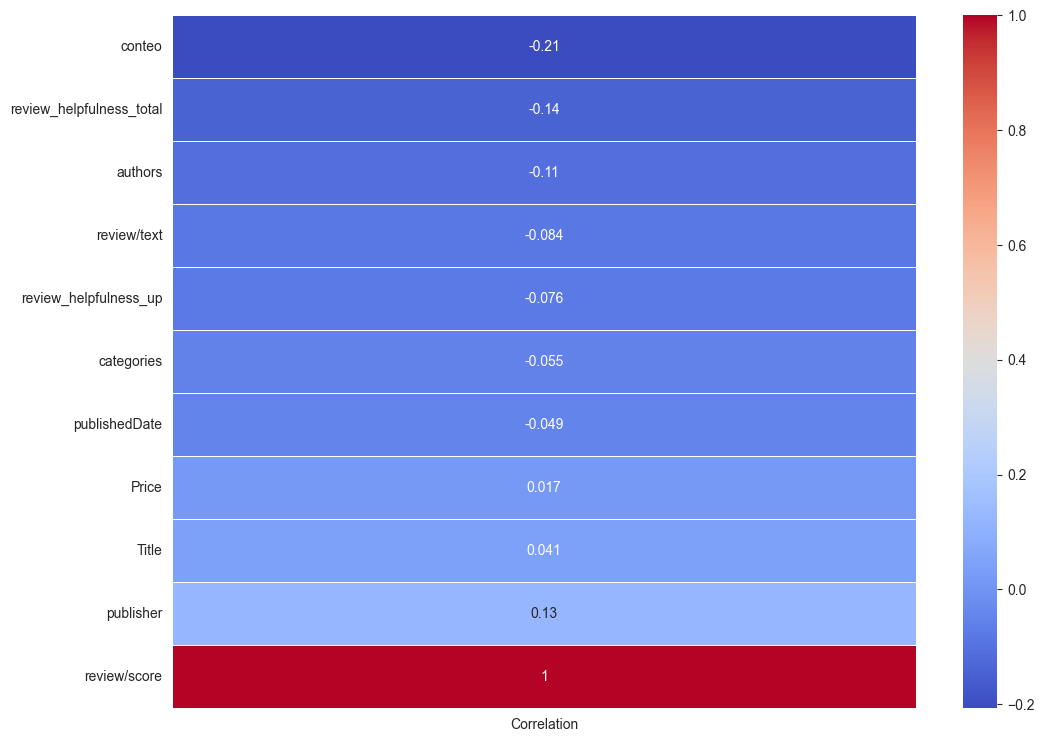

In [180]:
plt.figure(figsize=(12, 9))
sns.heatmap(correlacion_ord_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

#### A partir de codificación one-hot

In [181]:
correlacion_score_one_hot =df_one_hot.corrwith(df['review/score'])
correlacion_score_one_hot_df = pd.DataFrame(correlacion_score_one_hot, columns=['Correlation']).sort_values('Correlation').dropna()
correlacion_score_one_hot_df_abs = correlacion_score_one_hot_df.copy()
correlacion_score_one_hot_df_abs['Abs_Correlation'] =correlacion_score_one_hot_df['Correlation'].abs()
correlacion_score_one_hot_df_abs = correlacion_score_one_hot_df_abs.sort_values(by='Abs_Correlation', ascending=False)
correlacion_score_one_hot_df_abs

,Correlation,Abs_Correlation
review/score,1.000000,1.000000
authors_Thomas Harris,-0.239770,0.239770
Title_Hannibal,-0.239770,0.239770
publisher_Dell,-0.239770,0.239770
conteo,-0.207078,0.207078
...,...,...
categories_Games,-0.000796,0.000796
Title_Bringing Down the House: The Inside Story of Six M.I.T. Students Who Took Vegas for Millions,-0.000796,0.000796
authors_Ben Mezrich,-0.000796,0.000796
authors_Ernest J. Gaines,0.000064,0.000064


In [182]:
lim_inf = lim_sup = 0
incremento = 30
correlation_df_size = correlacion_score_one_hot_df.size
rangos = list()
for i in range(0,int((correlation_df_size/incremento))+1):
    lim_inf = i*incremento
    lim_sup = ((i+1)*incremento)-1
    if lim_sup >= correlation_df_size:
        lim_sup = correlation_df_size-1
    rangos.append((lim_inf, lim_sup))

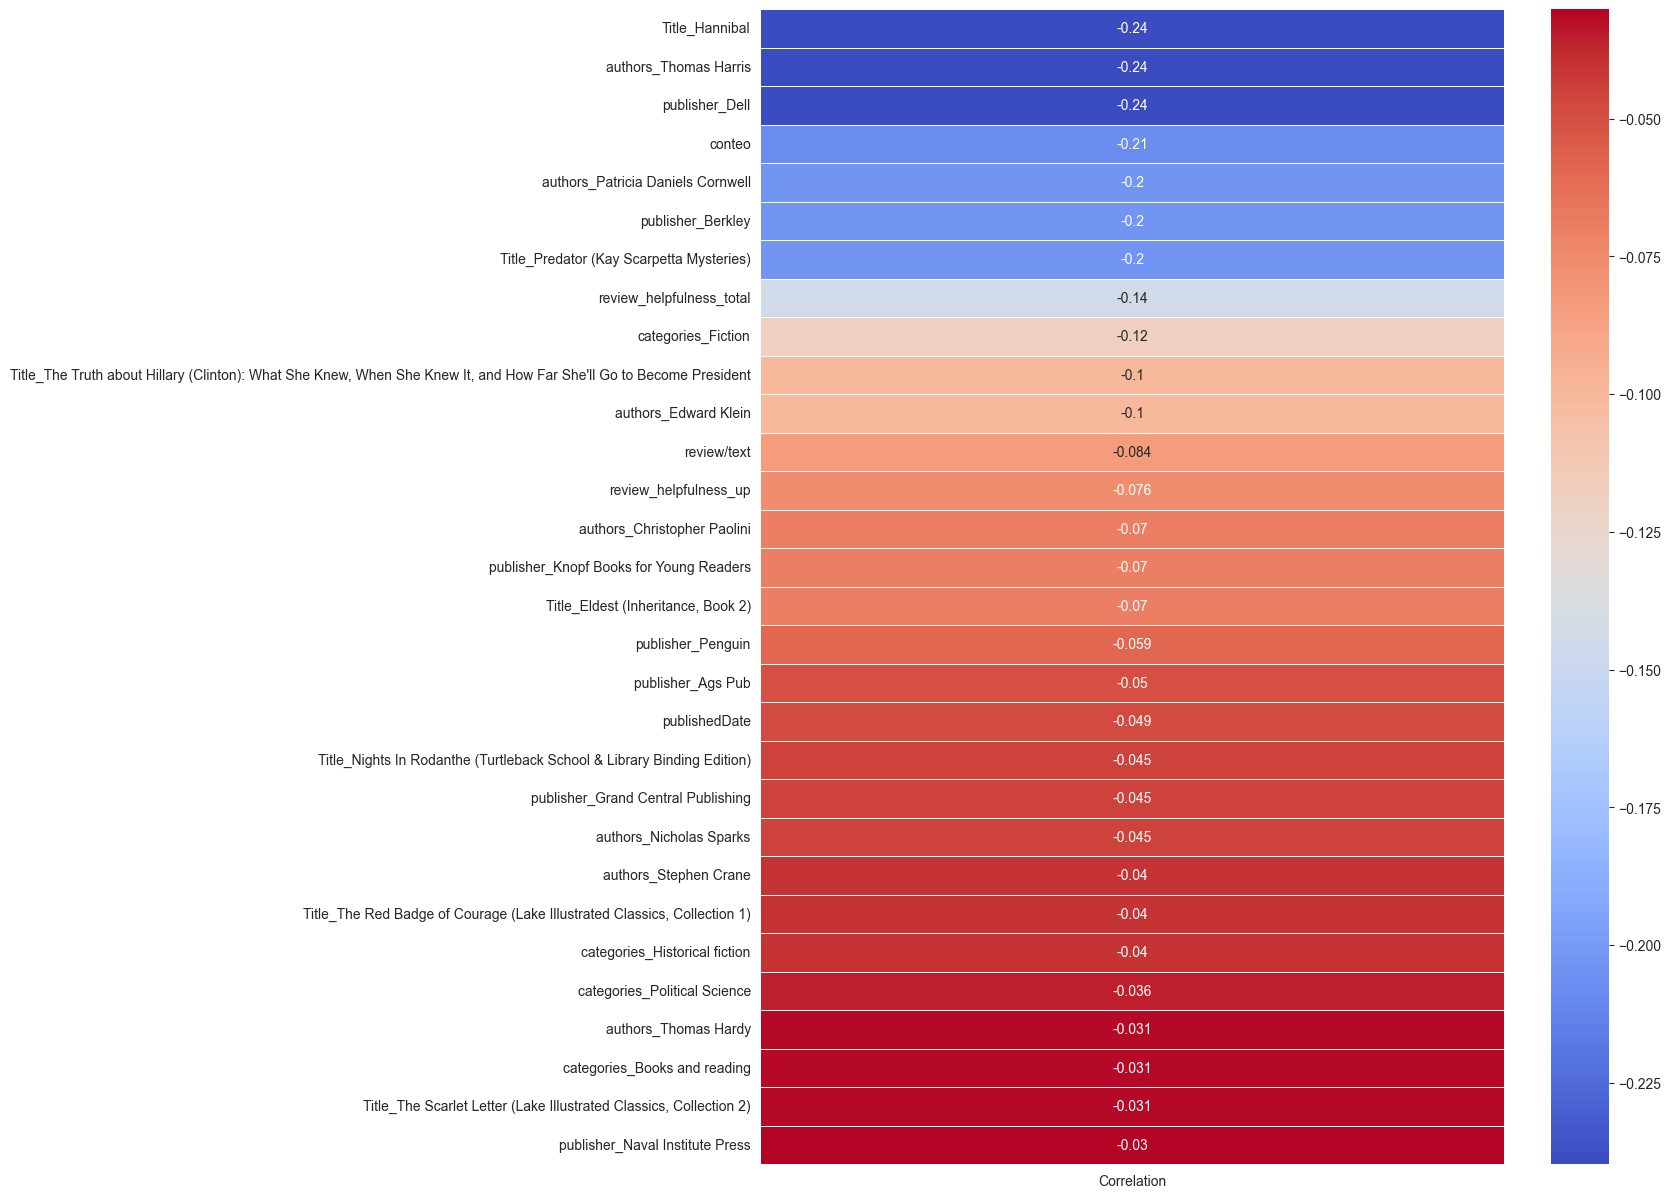

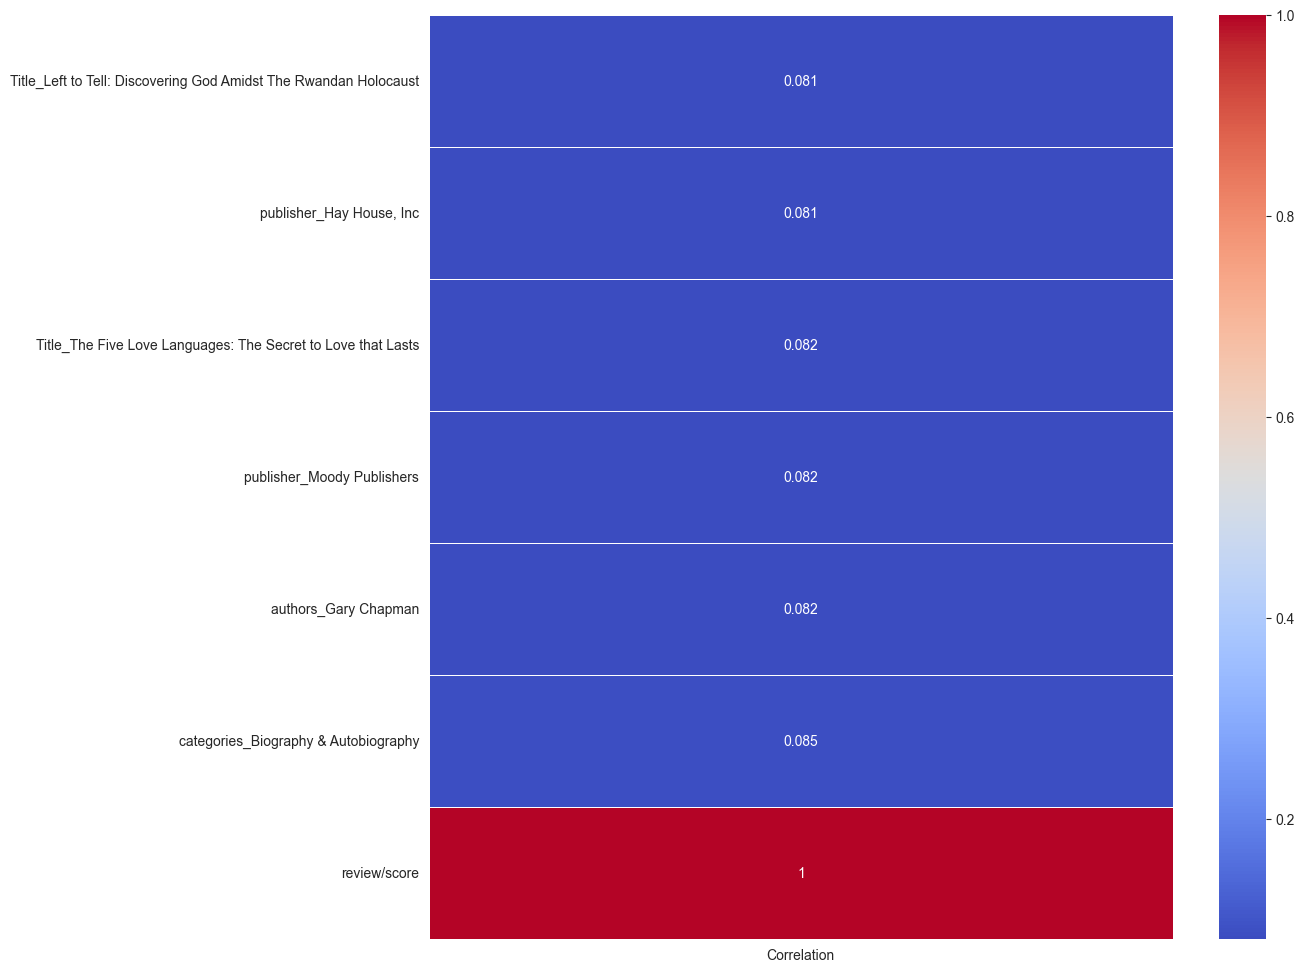

"for rango in rangos:\n    plt.figure(figsize=(12, 10))\n    sns.heatmap(correlacion_score_one_hot_df.iloc[rango[0]: rango[1]+1], annot=True, cmap='coolwarm', linewidths=0.5)\n    plt.show()"

In [183]:
plt.figure(figsize=(12, 15))
sns.heatmap(correlacion_score_one_hot_df.iloc[rangos[0][0]: rangos[0][1]+1], annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()
if len(rangos) >= 2:
    plt.figure(figsize=(12, 12))
    sns.heatmap(correlacion_score_one_hot_df.iloc[rangos[len(rangos)-1][0]: rangos[len(rangos)-1][1]+1], annot=True, cmap='coolwarm', linewidths=0.5)
    plt.show()

'''for rango in rangos:
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlacion_score_one_hot_df.iloc[rango[0]: rango[1]+1], annot=True, cmap='coolwarm', linewidths=0.5)
    plt.show()'''

### Análisis de correlación respecto al precio del libro

#### A partir de codificación ordinal normalizada

In [184]:
correlacion_price_ord =df_cod_num.corrwith(df['Price'])
correlacion_price_ord_df = pd.DataFrame(correlacion_price_ord, columns=['Correlation']).sort_values('Correlation').dropna()
correlacion_price_ord_df

,Correlation
publisher,-0.288131
authors,-0.280731
publishedDate,-0.227023
conteo,-0.094990
review_helpfulness_up,0.010926
review/score,0.016900
review_helpfulness_total,0.018936
review/text,0.033589
Title,0.127882
categories,0.216535


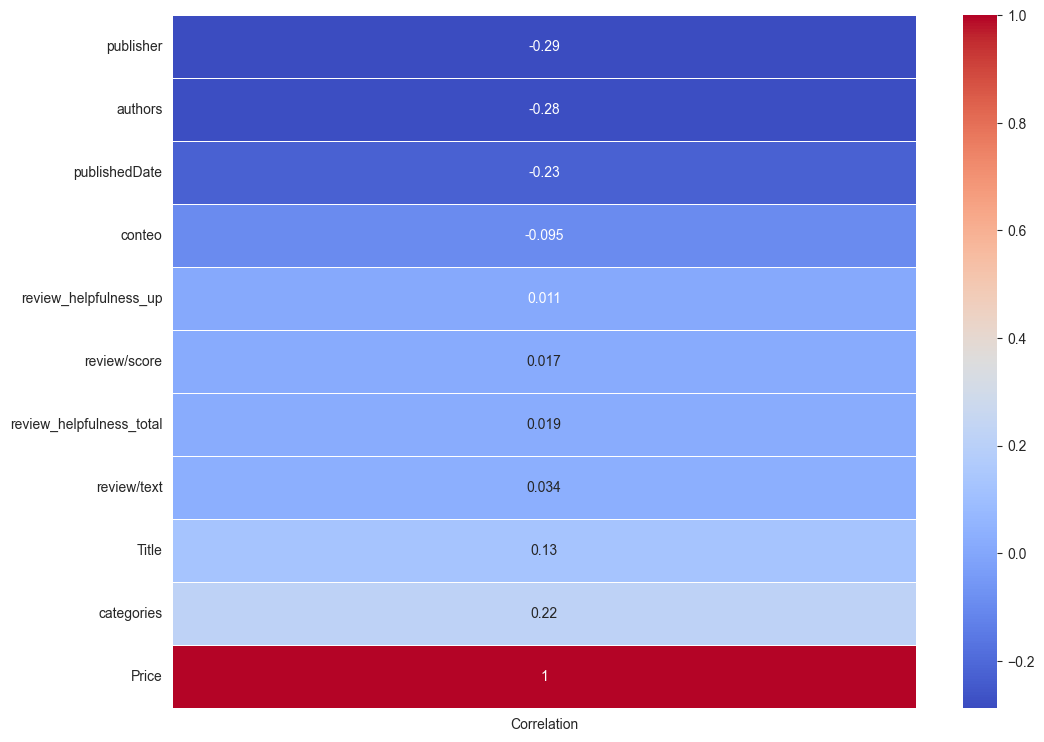

In [185]:
plt.figure(figsize=(12, 9))
sns.heatmap(correlacion_price_ord_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

#### A partir de codificación one-hot

In [186]:
correlacion_price_one_hot =df_one_hot.corrwith(df['Price'])
correlacion_price_one_hot_df = pd.DataFrame(correlacion_price_one_hot, columns=['Correlation']).sort_values('Correlation').dropna()
# Es necesario hacer la copia porque sino salta una excepción al momento de graficar
correlacion_price_one_hot_df_abs = correlacion_price_one_hot_df.copy()
correlacion_price_one_hot_df_abs['Abs_Correlation'] =correlacion_price_one_hot_df['Correlation'].abs()
correlacion_price_one_hot_df_abs = correlacion_price_one_hot_df_abs.sort_values(by='Abs_Correlation', ascending=False)
correlacion_price_one_hot_df_abs

,Correlation,Abs_Correlation
Price,1.000000,1.000000
categories_Social Science,0.807128,0.807128
authors_Arlie Russell Hochschild,0.807128,0.807128
Title_Stranger In A Strange Land: Library Edition,0.807128,0.807128
publisher_Amsterdam University Press,0.807128,0.807128
...,...,...
authors_Mark Steyn,-0.003306,0.003306
Title_America Alone: The End of the World as We Know It,-0.003306,0.003306
publisher_Crown Forum,0.000859,0.000859
authors_Jonah Goldberg,0.000859,0.000859


In [187]:
lim_inf = lim_sup = 0
incremento = 40
correlation_df_size = correlacion_price_one_hot_df.size
rangos = list()
for i in range(0,int((correlation_df_size/incremento))+1):
    lim_inf = i*incremento
    lim_sup = ((i+1)*incremento)-1
    if lim_sup >= correlation_df_size:
        lim_sup = correlation_df_size-1
    rangos.append((lim_inf, lim_sup))

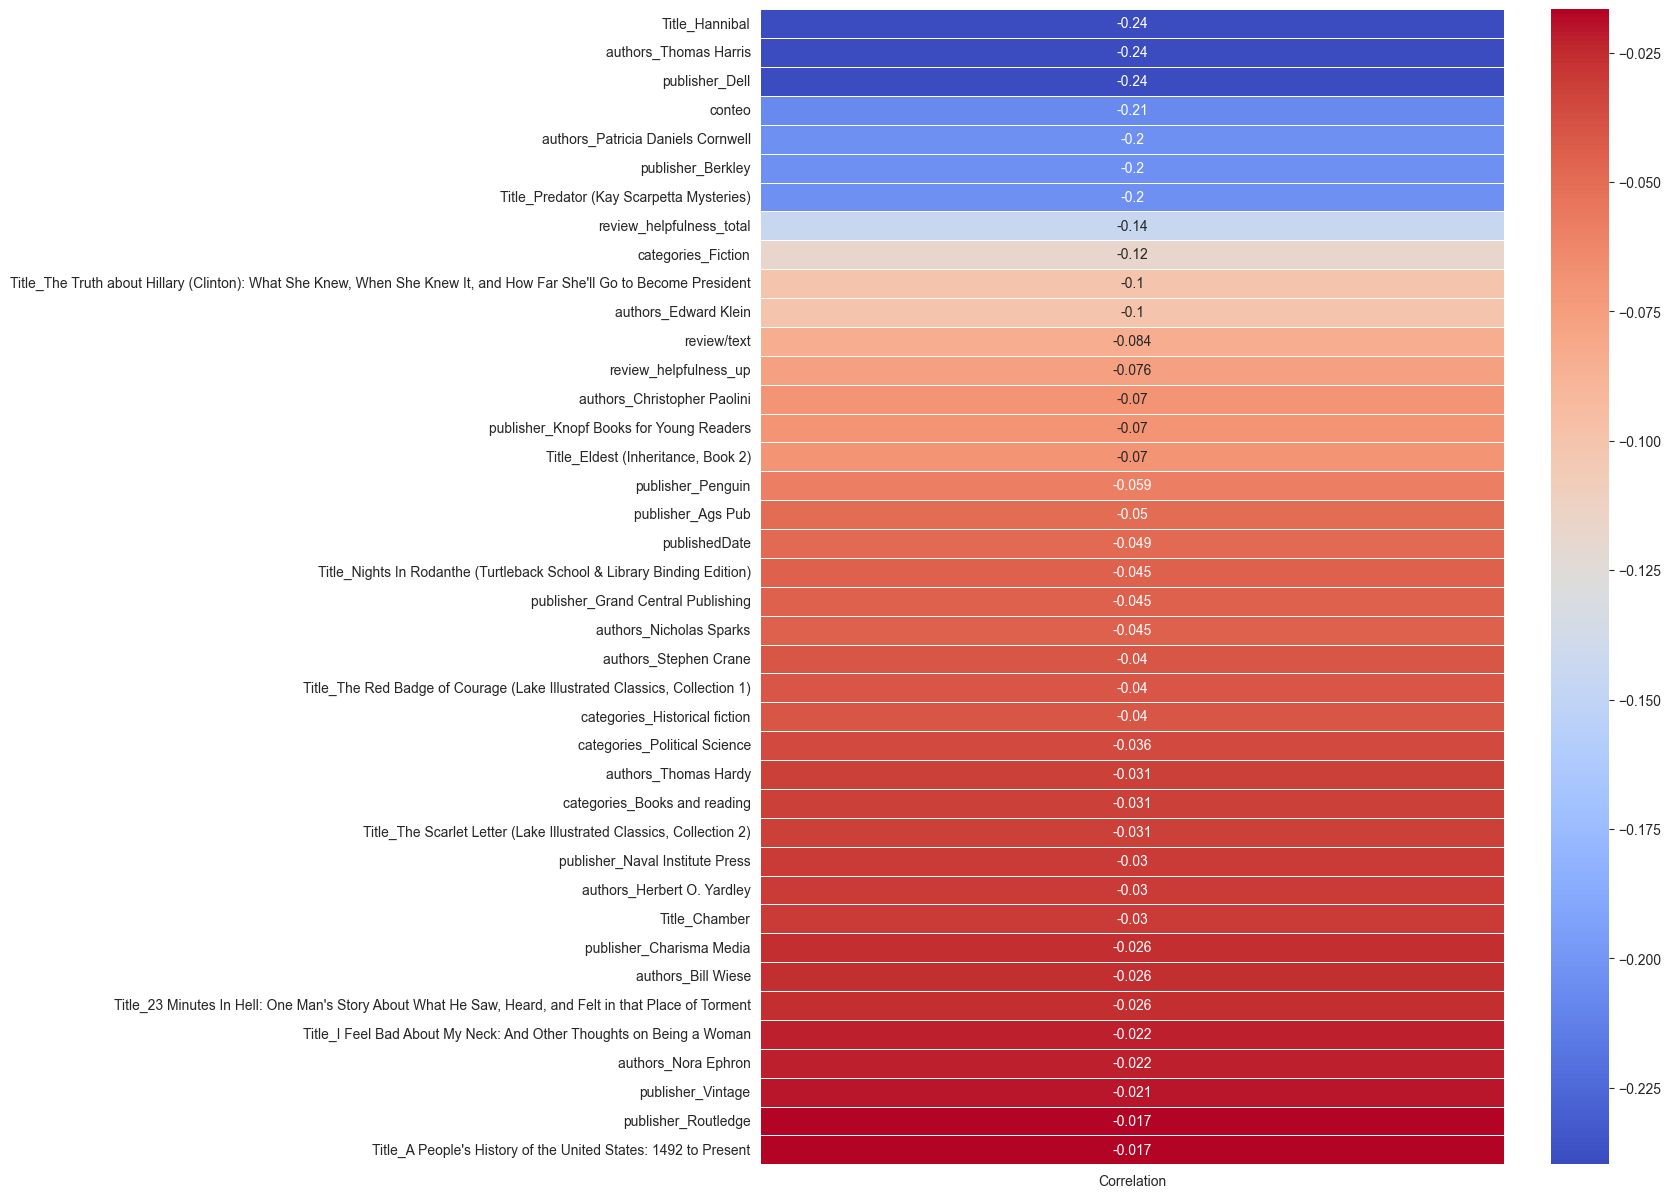

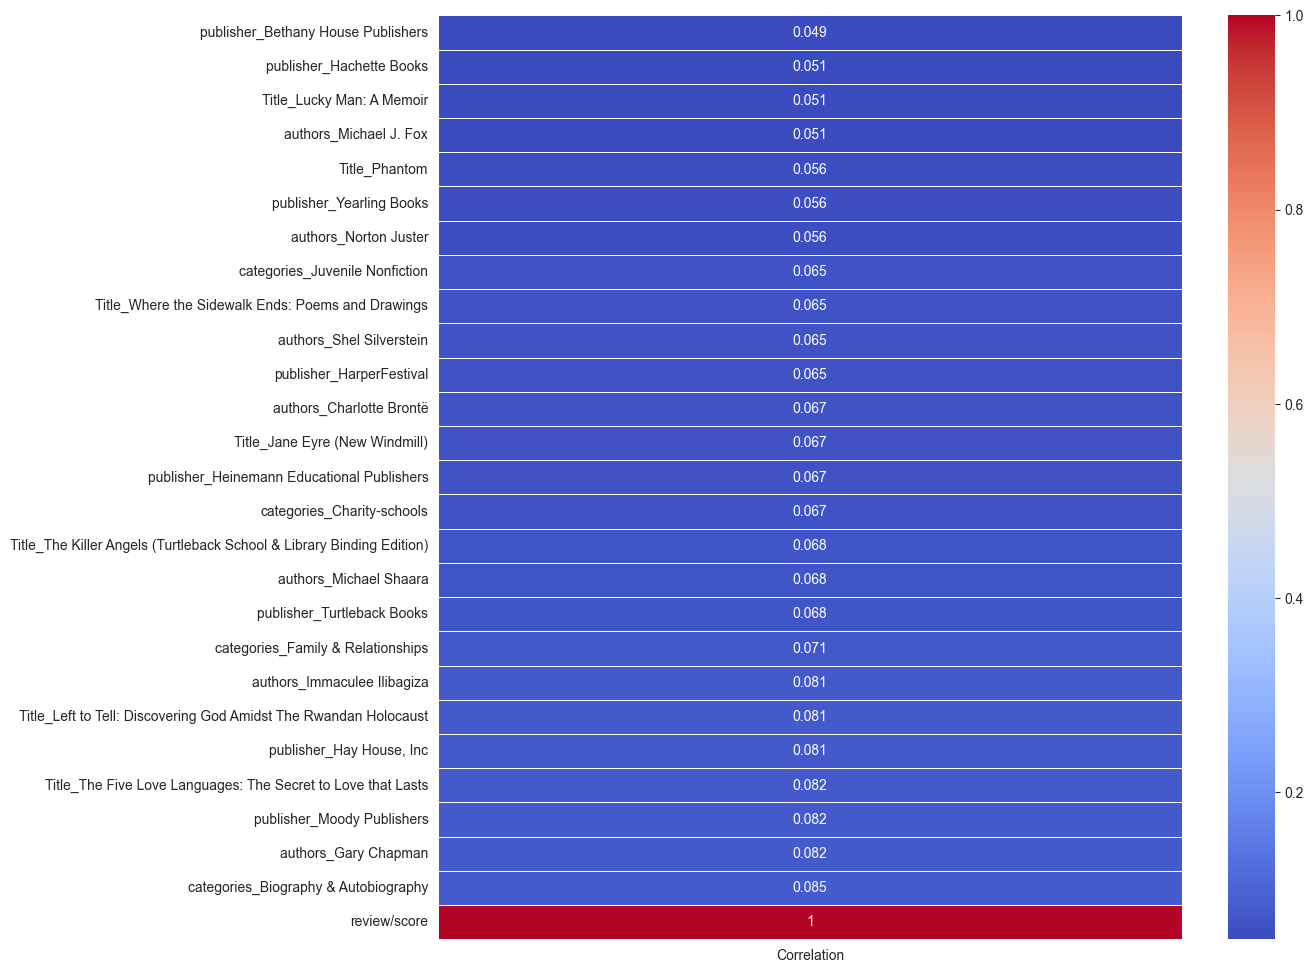

"for rango in rangos:\n    if rango[1] - rango[0] <= 0:\n        break\n    plt.figure(figsize=(12, 10))\n    sns.heatmap(correlacion_price_one_hot_df.iloc[rango[0]: rango[1]+1], annot=True, cmap='coolwarm', linewidths=0.5)\n    plt.show()"

In [188]:
plt.figure(figsize=(12, 15))
sns.heatmap(correlacion_score_one_hot_df.iloc[rangos[0][0]: rangos[0][1]+1], annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()
if len(rangos) >= 2:
    plt.figure(figsize=(12, 12))
    sns.heatmap(correlacion_score_one_hot_df.iloc[rangos[len(rangos)-1][0]: rangos[len(rangos)-1][1]+1], annot=True, cmap='coolwarm', linewidths=0.5)
    plt.show()

'''for rango in rangos:
    if rango[1] - rango[0] <= 0:
        break
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlacion_price_one_hot_df.iloc[rango[0]: rango[1]+1], annot=True, cmap='coolwarm', linewidths=0.5)
    plt.show()'''

### Resumen de los datos resultantes

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33754 entries, 0 to 33753
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        33754 non-null  object 
 1   review/score              33754 non-null  float64
 2   review/text               33754 non-null  int64  
 3   Title                     33754 non-null  object 
 4   authors                   33754 non-null  object 
 5   publisher                 33754 non-null  object 
 6   publishedDate             33754 non-null  int64  
 7   categories                33754 non-null  object 
 8   Price                     33754 non-null  float64
 9   conteo                    33754 non-null  int64  
 10  review_helpfulness_up     33754 non-null  int64  
 11  review_helpfulness_total  33754 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 3.1+ MB


In [198]:
distribucion_categorias = df['categories'].value_counts().sort_index()
distribucion_categorias.sort_values(ascending=False)

categories
Fiction                        11192
Juvenile Fiction                4038
History                         2265
Biography & Autobiography       2244
Family & Relationships          1743
Charity-schools                 1523
Political Science               1067
Business & Economics            1060
Executions and executioners      985
Religion                         940
Psychology                       783
Books and reading                777
Humor                            777
Social Science                   744
Young Adult Fiction              538
Games                            445
Historical fiction               427
Cooking                          415
Juvenile Nonfiction              400
Performing Arts                  389
Good and evil                    356
Computers                        346
True Crime                       300
Name: count, dtype: int64

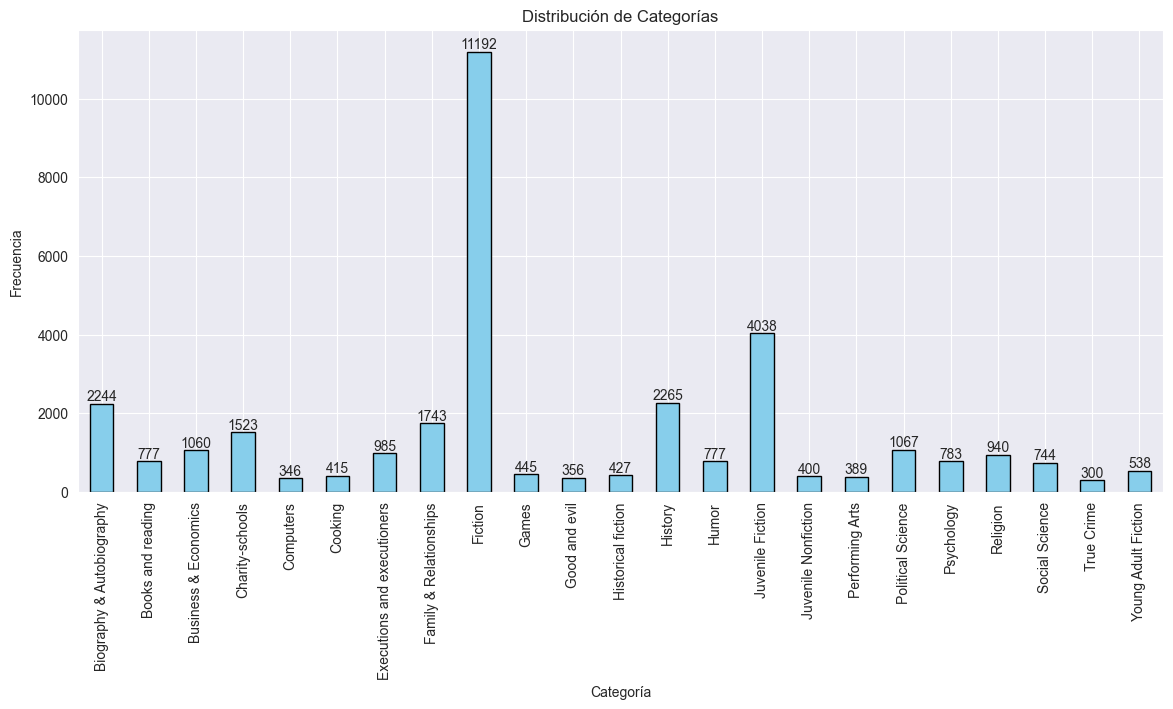

In [199]:
plt.figure(figsize=(14, 6))
ax = distribucion_categorias.plot(kind='bar', color='skyblue', edgecolor='black')

# Agrega etiquetas con el recuento en cada barra
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')

# Etiquetas y título
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Distribución de Categorías')

# Muestra el gráfico de barras
plt.show()

In [200]:
distribucion_autores = df['authors'].value_counts().sort_index()
distribucion_autores.sort_values(ascending=False)

authors
Thomas Harris                2793
Christopher Paolini          1643
Charlotte Brontë             1523
Jim Collins                  1060
Gary Chapman                  988
Charles Dickens               985
Michael Shaara                800
Leo Bormans                   783
Thomas Hardy                  777
Sherry Argov                  755
Lewis Carroll                 751
Jerry Spinelli                747
Arlie Russell Hochschild      744
Robert Louis Stevenson        731
Immaculee Ilibagiza           668
Ashley Audrain                661
Oscar Wilde                   655
Jonah Goldberg                630
Donald Miller                 621
Mark Steyn                    602
Ernest J. Gaines              566
Harriet Jacobs                555
Arthur Pike & David Pike      539
Tomi Adeyemi                  538
Diana Gabaldon                526
Kent Haruf                    515
Bill Wiese                    493
Jane Austen                   485
Nora Ephron                   473
Bonnie

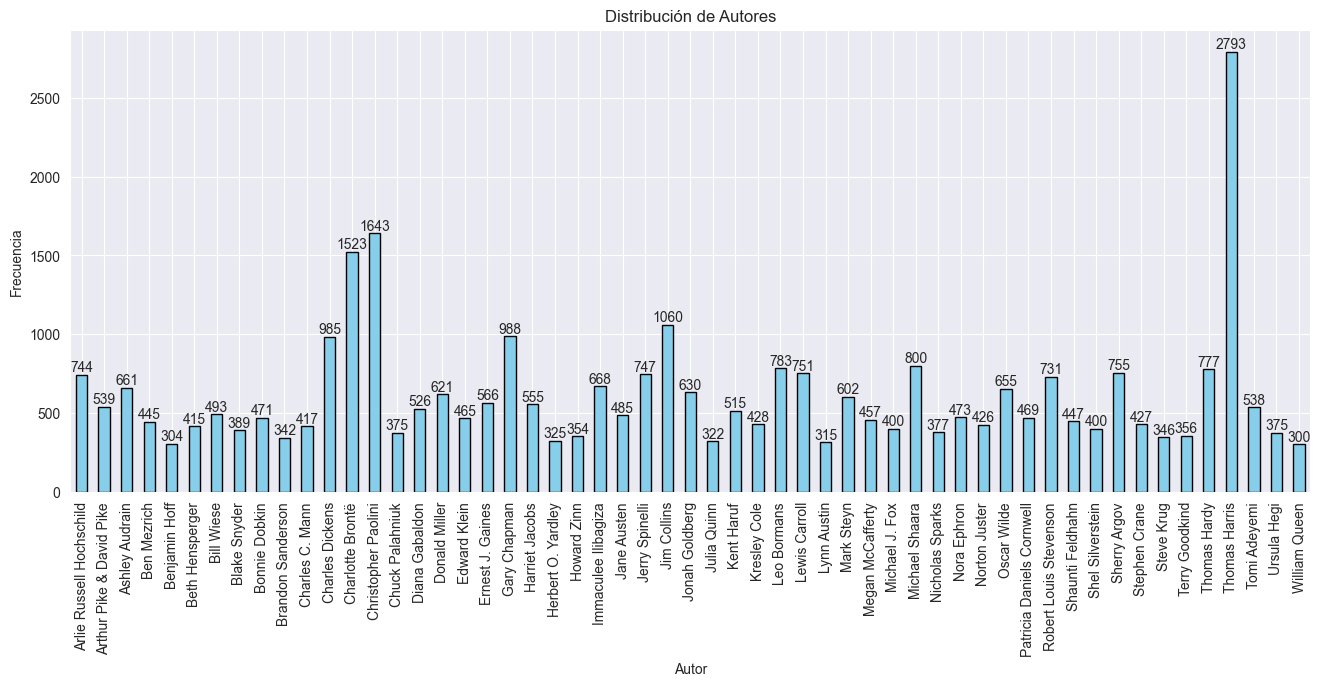

In [202]:
plt.figure(figsize=(16, 6))
ax = distribucion_autores.plot(kind='bar', color='skyblue', edgecolor='black')

# Agrega etiquetas con el recuento en cada barra
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')

# Etiquetas y título
plt.xlabel('Autor')
plt.ylabel('Frecuencia')
plt.title('Distribución de Autores')

# Muestra el gráfico de barras
plt.show()

In [204]:
distribucion_precios = df['Price'].value_counts().sort_index()
distribucion_precios.sort_values(ascending=False)

Price
7.67      2793
33.97     1643
14.02     1523
13.80     1271
26.95     1060
19.25      988
5.99       985
10.20      960
13.64      783
18.00      777
10.85      755
4.99       751
14.35      747
108.00     744
54.00      731
17.48      668
7.06       661
12.99      655
18.97      630
11.35      621
18.46      602
25.95      566
31.63      555
28.20      539
14.34      538
19.71      526
10.39      493
35.50      485
14.93      473
7.04       469
26.99      465
11.19      457
10.98      447
7.36       428
14.95      427
16.47      426
24.15      417
13.28      415
16.75      400
10.32      400
12.37      389
19.57      377
10.88      375
10.17      375
39.95      356
12.03      354
20.86      346
20.00      342
21.14      325
7.59       322
10.19      315
13.57      304
7.59       300
Name: count, dtype: int64

### Gráfico de barras de la cantidad de veces que aparece cada precio en las reseñas

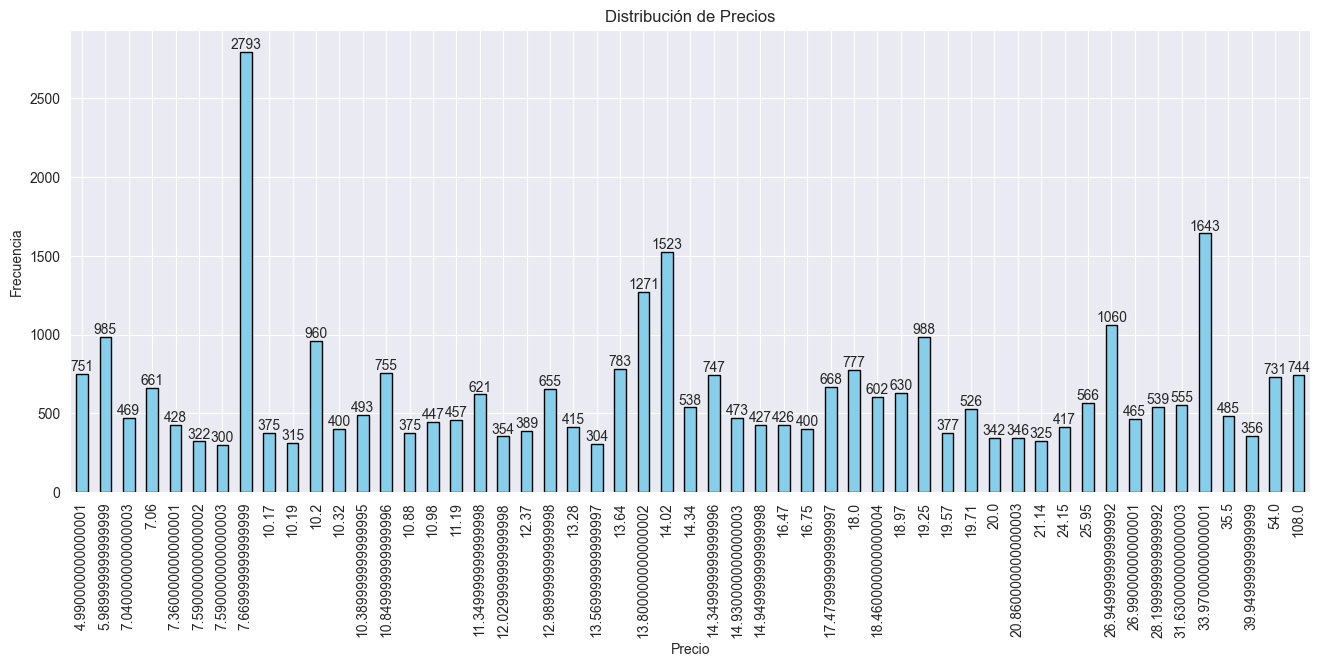

In [205]:
plt.figure(figsize=(16, 6))
ax = distribucion_precios.plot(kind='bar', color='skyblue', edgecolor='black')

# Agrega etiquetas con el recuento en cada barra
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')

# Etiquetas y título
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios')

# Muestra el gráfico de barras
plt.show()

KeyError: 0

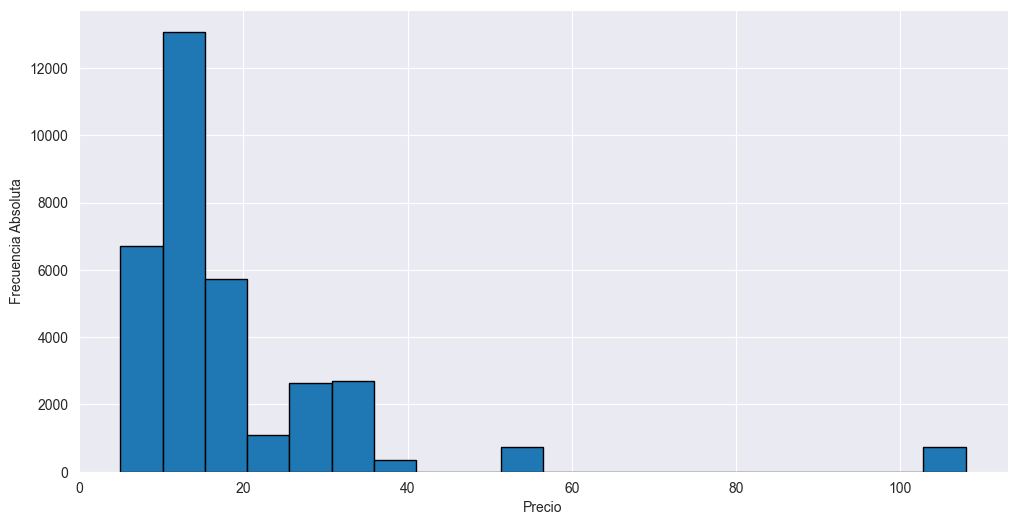

In [225]:
precios = df['Price'].dropna()

# Define la cantidad de bins que deseas para el histograma
num_bins = 20
# Calcula la frecuencia de cada rango de precios
frecuencia_absoluta = pd.cut(precios, bins=num_bins).value_counts().sort_index()
plt.figure(figsize=(12, 6))
# Crea el histograma
plt.hist(precios, bins=num_bins, edgecolor='k')

# Etiqueta los ejes
plt.xlabel('Precio')
plt.ylabel('Frecuencia Absoluta')

# Agrega etiquetas con la cantidad a cada barra del histograma
for i in range(len(frecuencia_absoluta)):
    plt.text(
        frecuencia_absoluta.index[i].mid,
        frecuencia_absoluta[i],
        str(frecuencia_absoluta[i]),
        ha='center'
    )

# Muestra el histograma
plt.show()

### Histograma de distribución de precios de los libros

In [206]:
precios = df.groupby('Id')['Price'].mean()
precios

Id
0060256672     10.32
0060838655     12.03
0307264556     14.93
0307280721     33.97
0321344758     20.86
0345487524      7.59
0375705856     10.20
0380800829      7.59
0385324162     19.71
0385511841     18.97
0393319296     10.17
0399152830      7.04
0435126024     14.02
0440224675      7.67
0525244581     13.57
0609807900     11.19
0613176375     13.80
0613224477     14.34
0613659155     19.57
0679766758      7.06
068484477X     10.88
068983375X      4.99
069452607X     26.95
0708982581     35.50
0743249992     10.20
0748608370     54.00
0764229893     10.19
0765311771     20.00
0785263705     11.35
0786185945    108.00
0786867647     16.75
0808598104     13.80
0833585568     14.35
0895260786     18.46
140004006X     24.15
1401911498     17.48
1416509879      7.36
1417627530     28.20
1419354795     26.99
155832156X     13.28
1561034371     14.95
1561035025     18.00
1580495974      5.99
1580627560     10.85
1580812287     25.95
1589269063     19.25
1590523172     10.98
1590862945

ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of labels (20).

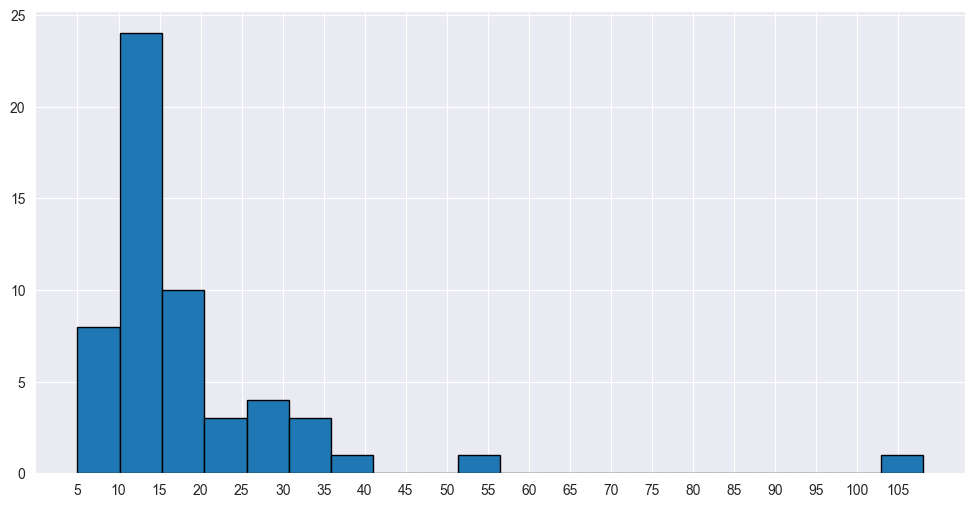

In [222]:
precios = df.groupby('Id')['Price'].mean().dropna()

# Define la cantidad de bins que deseas y calcula el histograma
num_bins = 20
hist, bin_edges = np.histogram(precios, bins=num_bins)

plt.figure(figsize=(12, 6))
# Crea el histograma
plt.hist(precios, bins=num_bins, edgecolor='k')

# Personaliza los límites de los ticks y las etiquetas
plt.xticks(np.arange(min(precios), max(precios) + 1, 5))
plt.gca().set_xticklabels(['${:.0f}-{:.0f}'.format(bin_edges[i], bin_edges[i + 1]) for i in range(len(bin_edges) - 1)])

# Etiqueta los ejes
plt.xlabel('Precio promedio')
plt.ylabel('Frecuencia')

# Agrega etiquetas con la cantidad de datos en cada columna
for i in range(len(hist)):
    plt.text(bin_edges[i], hist[i], str(hist[i]), ha='center', va='bottom')

# Muestra el histograma
plt.show()